In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [2]:
iris = load_iris()
x = iris.data
y = iris.target

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [4]:
pca = PCA(n_components=2)

In [5]:
x_pca = pca.fit_transform(x_scaled)

In [6]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


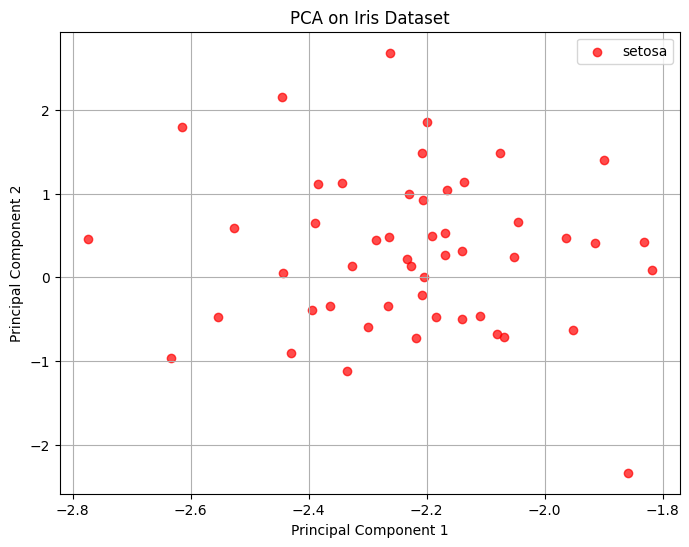

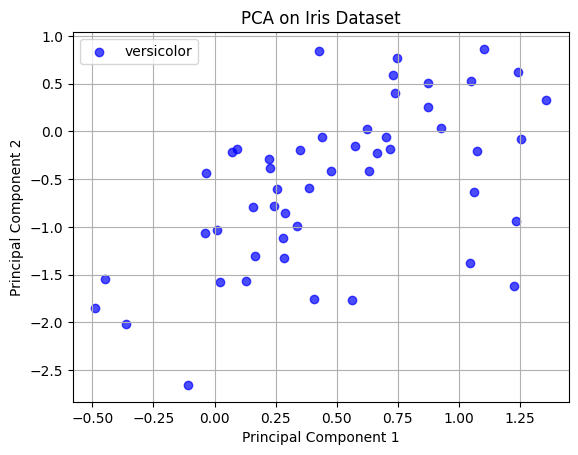

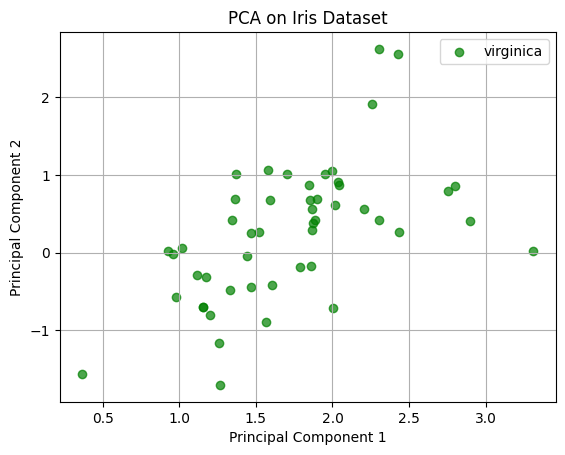

In [9]:
 #5. PCA 결과 시각화
# -두 개의 주성분을 사용해 데이터를 2D 플롯으로 시각화
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['red', 'blue', 'green'], iris.target_names):
    plt.scatter(x_pca[y == target, 0], x_pca[y == target, 1],color=color, label=label, alpha=0.7)
    plt.title('PCA on Iris Dataset')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid()
    plt.show()

In [10]:
# Isolation Forest : 이상치 탐지
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51025 (\N{HANGUL SYLLABLE EUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\projec

비정상 데이터 범위:
-요청 수 (Request Count): 23.80 ~ 144.50
-응답 시간 (Response Time): 58.22 ~ 145.66


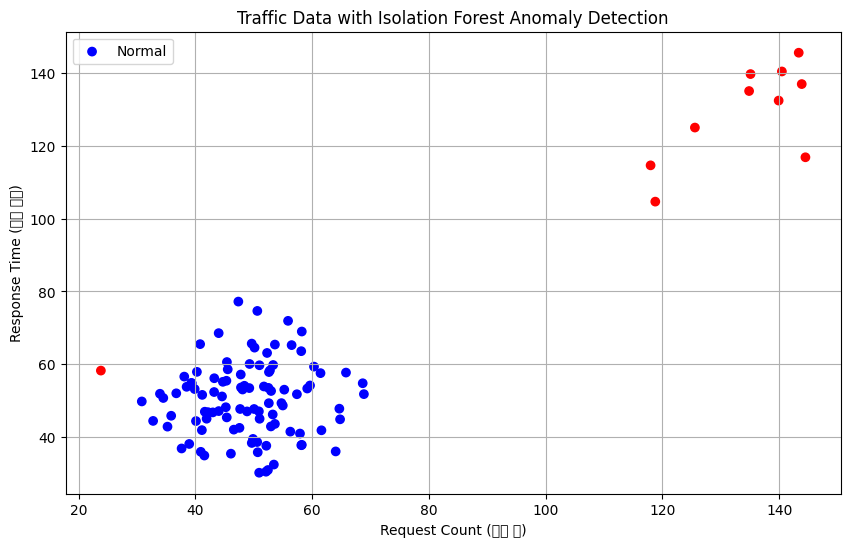

전체 데이터와 이상 탐지 결과:
     Request Count  Response Time  Anomaly Score  Anomaly
0        54.967142      48.617357              1   Normal
1        56.476885      65.230299              1   Normal
2        47.658466      47.658630              1   Normal
3        65.792128      57.674347              1   Normal
4        45.305256      55.425600              1   Normal
..             ...            ...            ...      ...
105     125.567120     125.075815             -1  Anomaly
106     139.914759     132.498197             -1  Anomaly
107     135.098344     139.789633             -1  Anomaly
108     144.500267     116.899758             -1  Anomaly
109     118.779148     104.699097             -1  Anomaly

[110 rows x 4 columns]


In [13]:
np.random.seed(42)

normal_traffic = np.random.normal(loc=50, scale=10, size=(100, 2))
anomalous_traffic = np.random.uniform(low=100, high=150, size=(10, 2))
traffic_data = np.vstack((normal_traffic, anomalous_traffic))
traffic_df = pd.DataFrame(traffic_data, columns=["Request Count", "Response Time"])
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

traffic_df['Anomaly Score'] = model.fit_predict(traffic_data)
traffic_df['Anomaly'] = traffic_df['Anomaly Score'].apply(lambda x: "Normal" if x == 1 else "Anomaly")

anomalous_data = traffic_df[traffic_df['Anomaly'] == "Anomaly"]

min_request_count = anomalous_data["Request Count"].min()
max_request_count = anomalous_data["Request Count"].max()
min_response_time = anomalous_data["Response Time"].min()
max_response_time = anomalous_data["Response Time"].max()

print(f"비정상 데이터 범위:")
print(f"-요청 수 (Request Count): {min_request_count:.2f} ~ {max_request_count:.2f}")
print(f"-응답 시간 (Response Time): {min_response_time:.2f} ~ {max_response_time:.2f}")

# 4. 시각화
# 정상과 비정상을 다른 색으로 표시하여 트래픽 데이터 시각화
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(10, 6))
plt.scatter(traffic_df["Request Count"], traffic_df["Response Time"],c=traffic_df['Anomaly'].map({"Normal": "blue", "Anomaly": "red"}),label='Traffic')
plt.title("Traffic Data with Isolation Forest Anomaly Detection")
plt.xlabel("Request Count (요청 수)")
plt.ylabel("Response Time (응답 시간)")
plt.legend(["Normal", "Anomaly"])
plt.grid()
plt.show()
 # 5. 결과 출력
# 전체 데이터프레임을 출력하여 정상/비정상 데이터 확인
print("전체 데이터와 이상 탐지 결과:")
print(traffic_df)